In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [6]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [7]:
split = int(0.8*len(x_train))
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:
x_train1 = x_train[:split]
y_train1 = y_train[:split]
x_val = x_train[split:]
y_val = y_train[split:]

In [9]:
print(x_train1.shape)
print(y_train1.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [10]:
model = keras.Sequential([
    layers.Input(shape=(32,32,3)),
    
    layers.Conv2D(96,kernel_size = (11,11),strides = (4,4),padding = 'same',activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2),strides = (2,2),padding = 'same'),
    
    layers.Conv2D(256,kernel_size = (5,5),strides = (1,1),padding = 'same',activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2),strides = (2,2),padding = 'same'),
    
    layers.Conv2D(384,kernel_size = (3,3),strides = (1,1),padding = 'same',activation = 'relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(384,kernel_size = (3,3),strides = (1,1),padding = 'same',activation = 'relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(256,kernel_size = (3,3),strides = (1,1),padding = 'same',activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2),strides = (2,2),padding = 'same'),
    
    layers.Flatten(),
    
    layers.Dense(4096,input_shape = (32,32,3),activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(4096,activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(1000,activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10,activation = 'softmax')
])

In [11]:
model.compile(optimizer = 'Adam',loss = keras.losses.categorical_crossentropy,metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1024      
 hNormalization)                                                 
                                                        

In [13]:
history = model.fit(x_train1,y_train1,batch_size = 32,epochs = 20,validation_data = (x_val,y_val))

Epoch 1/20
1250/1250 [==============================] - 28s 15ms/step - loss: 2.1899 - accuracy: 0.2955 - val_loss: 2.9974 - val_accuracy: 0.2300
Epoch 2/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.7738 - accuracy: 0.3897 - val_loss: 1.8222 - val_accuracy: 0.3826
Epoch 3/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.5808 - accuracy: 0.4492 - val_loss: 1.4993 - val_accuracy: 0.4743
Epoch 4/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.4656 - accuracy: 0.4910 - val_loss: 1.5354 - val_accuracy: 0.4609
Epoch 5/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.3803 - accuracy: 0.5215 - val_loss: 1.3218 - val_accuracy: 0.5316
Epoch 6/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.2968 - accuracy: 0.5523 - val_loss: 1.3223 - val_accuracy: 0.5202
Epoch 7/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.2139 - accuracy: 0.5776 - val_loss: 1.2082 -

In [14]:
history1 = model.evaluate(x_test,y_test,batch_size = 32)

313/313 [==============================] - 2s 5ms/step - loss: 1.8378 - accuracy: 0.6059


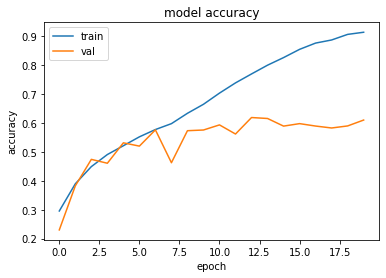

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

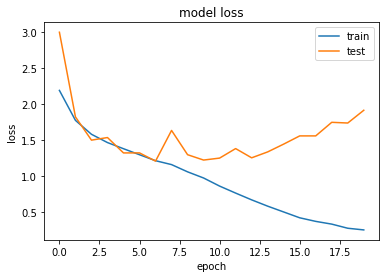

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')